In [72]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [101]:
def check_gt(val, list_to_compare): 
    
    # traverse in the list 
    for x in list_to_compare: 
  
        # compare with all the values 
        # with val 
        if val < x: 
            return False 
    return True

def check_lt(val, list_to_compare): 
    
    # traverse in the list 
    for x in list_to_compare: 
  
        # compare with all the values 
        # with val 
        if val > x: 
            return False 
    return True

In [119]:
# assuming 0 is 8 am, 60 is 9 am, get times (need to sort)
# determine if there was ever a moment of time where everyone was on Zoom
def zoom_party(population):
    t1 = [60 * random.random() for _ in range(population)]
    t2 = [60 * random.random() for _ in range(population)]
    # swap times if needed to keep chronological order
    on_off_list = np.array([[el[0], el[1]] if el[0] < el[1] else [el[1], el[0]] 
                            for el in list(zip(t1, t2))])
    

    # Find person who logged on before everyone else signed off and signed off before everyone else signed on
    # Do not check all cases, just get first positive case for efficiency
    for idx, el in enumerate(on_off_list):
        if check_lt(el[0], np.delete(on_off_list, idx, axis=0)[:,1]) and check_gt(el[1], np.delete(on_off_list, idx, axis=0)[:,0]):
                return True
        
    return False


In [132]:
combos = []
for n_parties in range(200,1100,400):
    for n_people in 3300*np.arange(1,5):
        print(f'n_people {n_people} n_parties {n_parties}')
        list_of_parties = [zoom_party(n_people) for _ in range(n_parties)]
        combos.append([n_people, 
                       n_parties, 
                       np.mean(list_of_parties), 
                       np.std(list_of_parties) / np.sqrt(len(list_of_parties))])

n_people 3300 n_parties 200
n_people 6600 n_parties 200
n_people 9900 n_parties 200
n_people 13200 n_parties 200
n_people 3300 n_parties 600
n_people 6600 n_parties 600
n_people 9900 n_parties 600
n_people 13200 n_parties 600
n_people 3300 n_parties 1000
n_people 6600 n_parties 1000
n_people 9900 n_parties 1000
n_people 13200 n_parties 1000


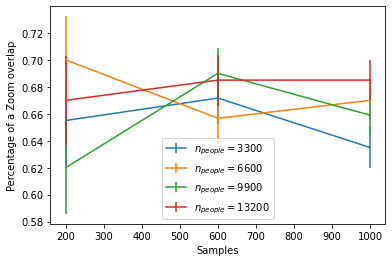

In [133]:
combos = np.array(combos)
for n_people in np.unique(combos[:,0]):
    data = combos[combos[:,0] == n_people]
    plt.errorbar(x = data[:,1], y = data[:,2], yerr = data[:,3], label = r'$n_{people}=$'+str(int(n_people)))
plt.xlabel('Samples')
plt.ylabel('Percentage of a Zoom overlap')
plt.legend()
plt.show()

As we see no variation with the number of people or number of parties sampled, we conclude that 2/3 of calls will have someone who sees everyone once!